# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [10]:
data_file = "pizza_delivery_locations.csv"

In [11]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [12]:
# clustering code for 2,3 and 4 clusters
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

def find_store_locations(data, k_values):
    store_locations = {}
    for k in k_values:
        
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        centroids = kmeans.cluster_centers_
        store_locations[k] = [tuple(np.round(coord, 6)) for coord in centroids]
    return store_locations

delivery_data = pd.read_csv(data_file)


In [13]:
# Extracting best store locations for each cluster of addresses
k_values = [2, 3, 4]
store_locations = find_store_locations(delivery_data, k_values)
store_locations

{2: [(43.668166, -116.266048), (43.637273, -116.225247)],
 3: [(43.668166, -116.266048),
  (43.641814, -116.240366),
  (43.63263, -116.209792)],
 4: [(43.663956, -116.266879),
  (43.63263, -116.209792),
  (43.641814, -116.240366),
  (43.723879, -116.255046)]}

## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

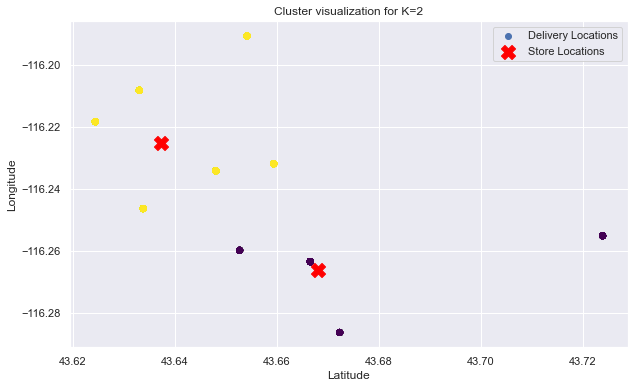

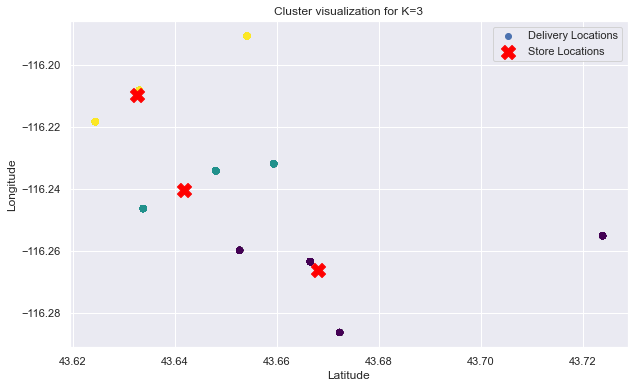

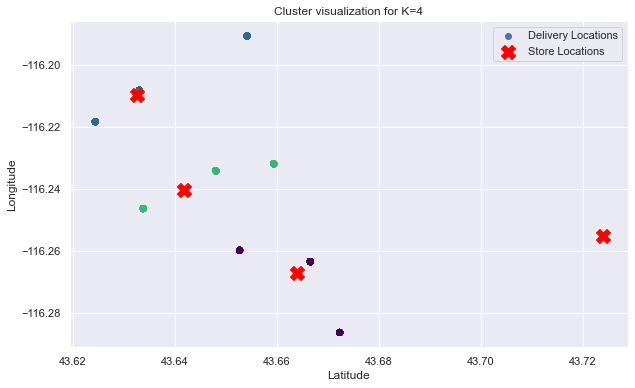

In [14]:
import matplotlib.pyplot as plt

def plot_clusters(data, store_locations, k):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o', label='Delivery Locations')
    # Plotting the centroids (store locations)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Store Locations')
    plt.title(f'Cluster visualization for K={k}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend()
    plt.show()

for k in k_values:
    plot_clusters(delivery_data, store_locations[k], k)


## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.